<a href="https://colab.research.google.com/github/Minh-A/Dacon/blob/main/Dacon_LSTM_Beta2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리

In [ ]:
# 파이토치 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader, TensorDataset
from torch.autograd import Variable  # 자동미분기능 제공
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm  # 진행표시바

# np.random.seed(777)
# torch.manual_seed(777)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # GPU, CPU 선택
print('CPU? GPU? : ', device)

CPU? GPU? :  cuda:0


In [ ]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train.csv')
fn

,month,file_nm
0,1978-11,197811.npy
1,1978-12,197812.npy
2,1979-01,197901.npy
3,1979-02,197902.npy
4,1979-03,197903.npy
...,...,...
477,2018-08,201808.npy
478,2018-09,201809.npy
479,2018-10,201810.npy
480,2018-11,201811.npy


---

In [ ]:
n = fn.iloc[:,1]
n

0      197811.npy
1      197812.npy
2      197901.npy
3      197902.npy
4      197903.npy
          ...    
477    201808.npy
478    201809.npy
479    201810.npy
480    201811.npy
481    201812.npy
Name: file_nm, Length: 482, dtype: object

In [ ]:
# 훈련, 테스트 데이터 나누기
# 데이터를 많이 나누어서 실행
tr1 = fn.iloc[:50,1]
tr2 = fn.iloc[50:100,1]
tr3 = fn.iloc[100:150,1]
tr4 = fn.iloc[150:200,1]
tr5 = fn.iloc[200:250,1]
tr6 = fn.iloc[250:300,1]
tr7 = fn.iloc[300:350,1]
tr8 = fn.iloc[350:400,1]

te1 = fn.iloc[400:450,1]
te2 = fn.iloc[450:,1]

In [ ]:
# 데이터 생성
# 함수화
for i in range(8):
  globals()['tr_{}'.format(i)] = fn.iloc[(50*i):(50*(i+1)),1]

for i in range(2):
  globals()['te_{}'.format(i)] = fn.iloc[:50,1]

In [ ]:
for i in range(8):
  print('tr_{}'.format(i))

tr_0
tr_1
tr_2
tr_3
tr_4
tr_5
tr_6
tr_7


In [ ]:
# 홀드아웃, 훈련 데이터, 검증 데이터, 테스트 데이터

In [ ]:
data=[]
for i in tqdm(tr):
    data.append(np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/'+i))
data = np.array(data)

100%|██████████| 450/450 [07:15<00:00,  1.03it/s]


In [ ]:
data.shape

(450, 448, 304, 5)

In [ ]:
test=[]
for i in tqdm(te):
    test.append(np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/'+i))
test = np.array(test)

100%|██████████| 32/32 [00:35<00:00,  1.12s/it]


In [ ]:
test.shape

(32, 448, 304, 5)

모델링

In [ ]:
train = data.reshape(450,5,448,304)
train.shape

NameError: ignored

In [ ]:
print(train.shape,"\n", train[0].shape,'\n', train[0][0].shape)

(450, 5, 448, 304) 
 (5, 448, 304) 
 (448, 304)


In [ ]:
for i in tqdm(range(5)):
  hh = train[0][i].flatten()
  print(hh, hh.shape)

100%|██████████| 5/5 [00:00<00:00, 872.36it/s]

[0 0 0 ... 0 0 0] (136192,)
[0 1 0 ... 0 0 1] (136192,)
[0 0 0 ... 1 0 0] (136192,)
[0 0 1 ... 0 0 0] (136192,)
[0 0 0 ... 0 0 0] (136192,)


In [ ]:
# 아아아아아 모델링이 고민이다야
# 1차원 만들어잉
train[0][0].flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

다시 해해해해

모델링 하면서 돌아가게 할까.... 훔훔


## 여기서 다시 해봄

In [ ]:
fn.shape

(482, 2)

In [ ]:
# 일단 마지막으로 도전
# 이거는 데이터명만
te_2 = fn.iloc[431:482,1]
te_2.shape
te_1 = te_2

In [ ]:
# 데이터 생성
data=[]
for i in tqdm(te_1):
    data.append(np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/'+i))
data = np.array(data)
data.shape

100%|██████████| 51/51 [00:14<00:00,  3.57it/s]


(51, 448, 304, 5)

In [ ]:
# 데이터 셋 크게 만들기
# 2차원 이미지를 1차원으로

train = data.reshape(51,-1,5)
train.shape

(51, 136192, 5)

In [ ]:
# 그냥 확인
print(data[0].flatten())
print(data[0].shape)

[0 0 0 ... 0 0 0]
(448, 304, 5)


In [ ]:
# 그냥 확인
a = data[0].reshape(-1,5)
print(a)
print(a.shape)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
(136192, 5)


In [ ]:
# 그냥 확인
train[0][:,0].shape

(136192,)

In [ ]:
# 일단은 그 1번째 사진만!!!
tr1=[]
for i in tqdm(range(51)):
    tr1.append(train[i][:,0])
tr1 = np.array(tr1)
tr1.shape

100%|██████████| 51/51 [00:00<00:00, 70480.89it/s]


(51, 136192)

In [ ]:
tr1 = tr1.reshape(51,1,136192)
tr11 = tr1[:-1]
print(tr11.shape)

(50, 1, 136192)


In [ ]:
136192/4256

32.0

In [ ]:
# 한번 해볼까요?
tr11 = tr11[:,:,68096:72352]
tr11.shape

(50, 1, 4256)

In [ ]:
# Model 생성
import torch
import torch.nn as nn
import torch.nn.functional as F

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size = input_size,
                            hidden_size = hidden_size,
                            batch_first=True,
                            num_layers = 2)
        self.time_fc = nn.Linear(hidden_size, 4256)
    

    def forward(self, x_time):
        out_time, _ = self.lstm(x_time)
        out_time = self.time_fc(out_time[1,:, -4256:])  # 나오는 수 아웃풋
        
        return out_time.view(-1,1,4256)  # -1은 전체 나와라
  
model = LSTM(input_size = 4256, hidden_size = 4256).to(device)  # to(device)를 통해 GPU로
model

LSTM(
  (lstm): LSTM(4256, 4256, batch_first=True)
  (time_fc): Linear(in_features=4256, out_features=4256, bias=True)
)

In [ ]:
# 일단 이거!!!!!!!
te1 = tr1[-1]
te1 = te1.reshape(1,1,136192)
te1 = te1[:,:,68096:72352]
print(te1.shape)

(1, 1, 4256)


In [ ]:
# 온라인 학습 (하나씩 학습)
te1 = tr1[1:]
print(te1.shape)

(50, 136192, 1)


In [ ]:
# 학습 전 데이터 전처리
window_x = torch.tensor(tr11).float().to(device)  # 데이터를 GPU로
window_y = torch.tensor(te1).float().to(device)

In [ ]:
model(window_x).shape

torch.Size([1, 1, 4256])

In [ ]:
window_y.shape

torch.Size([1, 1, 4256])

In [ ]:
window_y = window_y[0].reshape(1,136192,1)
window_y.shape

torch.Size([1, 136192, 1])

In [ ]:
from random import *
uniform(0.00001,0.2)

0.07031596428144696

In [ ]:
# 가장 완벽한 러닝 레이트를 찾아
from random import *

for i in range(10):
  a = uniform(0.0001,0.2)
  print("\n",a)
  
  optimizer = torch.optim.Adam(model.parameters(), lr = a)  
  criterion = nn.MSELoss()
  num_epochs  = 2
  train_error = []

  for t in range(num_epochs):
    train_pred = model(window_x)
    loss = criterion(train_pred, window_y)  
    train_error.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (t +1) % 1 == 0:
      print((t +1), "Epochs train MSE: ", loss.item())


 0.04533071345694787
1 Epochs train MSE:  23416.771484375
2 Epochs train MSE:  13868.341796875

 0.06461227790700928
1 Epochs train MSE:  14832.51171875
2 Epochs train MSE:  17843.515625

 0.09387570287420513
1 Epochs train MSE:  14486.9140625
2 Epochs train MSE:  27943.9765625

 0.12039715457259792
1 Epochs train MSE:  14737.9375
2 Epochs train MSE:  39520.06640625

 0.12670077541383337
1 Epochs train MSE:  15542.4501953125
2 Epochs train MSE:  39923.05078125

 0.11527655732114982
1 Epochs train MSE:  15979.8857421875
2 Epochs train MSE:  32821.21484375

 0.041382667159633985
1 Epochs train MSE:  15843.7431640625
2 Epochs train MSE:  13562.1787109375

 0.14345234632135725
1 Epochs train MSE:  15221.3466796875
2 Epochs train MSE:  51173.13671875

 0.19582051728615124
1 Epochs train MSE:  16475.267578125
2 Epochs train MSE:  86009.7890625

 0.09892808719831633
1 Epochs train MSE:  19176.587890625
2 Epochs train MSE:  20976.544921875


In [ ]:
# 가장 완벽한 러닝 레이트를 찾아
from random import *
a = [0.02,0.025,0.15]

for i in range(len(a)):
  lr = a[i]
  print("\n",a[i])
  
  optimizer = torch.optim.Adam(model.parameters(), lr = lr)  
  criterion = nn.MSELoss()
  num_epochs  = 2
  train_error = []

  for t in range(num_epochs):
    train_pred = model(window_x)
    loss = criterion(train_pred, window_y)  
    train_error.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (t +1) % 1 == 0:
      print((t +1), "Epochs train MSE: ", loss.item())


 0.02
1 Epochs train MSE:  23416.955078125
2 Epochs train MSE:  17773.384765625

 0.025
1 Epochs train MSE:  13224.498046875
2 Epochs train MSE:  8546.9462890625

 0.15
1 Epochs train MSE:  4061.9873046875
2 Epochs train MSE:  41399.73046875


In [ ]:
model(window_x).shape

torch.Size([1, 4256, 1])

In [ ]:
window_y.shape

torch.Size([1, 1, 4256])

In [ ]:

# 훈련
optimizer = torch.optim.Adam(model.parameters(), lr = 0.025)  
criterion = nn.MSELoss(size_average = True)
num_epochs  = 100
train_error = []

for t in range(num_epochs):
  train_pred = model(window_x)
  loss = criterion(train_pred, window_y)  
  train_error.append(loss)
    
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
    
  if (t +1) % 10 == 0 and t != 1:
      print("\n", (t +1), "Epochs train MSE: ", loss.item())


 10 Epochs train MSE:  995.5794677734375

 20 Epochs train MSE:  1647.2109375

 30 Epochs train MSE:  156.1287384033203

 40 Epochs train MSE:  230.30677795410156

 50 Epochs train MSE:  8.869860649108887

 60 Epochs train MSE:  32.86051940917969

 70 Epochs train MSE:  3.4839894771575928

 80 Epochs train MSE:  1.988754391670227

 90 Epochs train MSE:  1.4182084798812866

 100 Epochs train MSE:  0.15677671134471893


쓰바아아아아아아ㅏ 이거야야야야야

# 모델은 4개씩 8번 초기화 실행
> 총 32번

In [ ]:
# Model 생성
import torch
import torch.nn as nn
import torch.nn.functional as F

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size = input_size,
                            hidden_size = hidden_size,
                            batch_first=True,
                            num_layers = 2)
        self.time_fc = nn.Linear(hidden_size, 4256)
    

    def forward(self, x_time):
        out_time, _ = self.lstm(x_time)
        out_time = self.time_fc(out_time[-12:,:, -4256:])  # 나오는 수 아웃풋
        
        return out_time.view(-1,1,4256)  # -1은 전체 나와라

In [ ]:
# 32개의 모델을 생성
for i in tqdm(range(2)):
  globals()['model_{}'.format(i)] = LSTM(input_size = 4256, hidden_size = 4256).to(device)

100%|██████████| 2/2 [00:14<00:00,  7.36s/it]


# 데이터 셋 만들기
> 함수로

> 12개를 예측하도록

In [1]:
fn.shape

NameError: ignored

In [2]:
# 일단 마지막으로 도전
# 이거는 데이터명만
dm = fn.iloc[422:482,1]
dm.shape

NameError: ignored

In [ ]:
# 데이터 생성
data=[]
for i in tqdm(dm):
    data.append(np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/'+i))
data = np.array(data)
data.shape

In [ ]:
# 데이터 셋 크게 만들기
# 2차원 이미지를 1차원으로

data = data.reshape(60,5,-1)
data.shape

In [ ]:
# 일단은 그 1번째 사진만!!!
data1=[]
for i in tqdm(range(60)):
    data1.append(data[i][0,:])
data1 = np.array(data1)
data1 = data1.reshape(60,1,136192)
data1.shape

In [ ]:
# 그냥
train = data1[:-1]
print(train.shape)

In [ ]:
# 그냥
test = data1[-1]
test = test.reshape(1,1,136192)
test = test[:,:,68096:72352]
print(test.shape)

In [ ]:
# 이야아 이거 전처리 지린다잉

def datapp(number):
  global window_x, window_y, window_z

  train = data1[:-12]
  test = data1[-12:]
  test = test.reshape(12,1,136192)

  num = 4256 * number
  train = train[:,:,num:(num+4256)]
  test = test[:,:,num:(num+4256)]

  window_x = torch.tensor(train).float().to(device)  # 데이터를 GPU로
  window_y = torch.tensor(test).float().to(device)

  prd = data1.reshape(60,1,136192)
  prd = prd[:,:,num:(num+4256)]
  window_z = torch.tensor(prd).float().to(device)

  return train.shape, test.shape, prd.shape

In [ ]:
# 훈련 함수

def mo(name):
  optimizer = torch.optim.Adam(name.parameters(), lr = 0.03) # 0.025
  criterion = nn.MSELoss(size_average = True)
  num_epochs  = 200
  train_error = []

  for t in range(num_epochs):
    train_pred = name(window_x)
    loss = criterion(train_pred, window_y)  
    train_error.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (t +1) % 50 == 0 and t != 1:
        print("\n", (t +1), "Epochs train MSE: ", loss.item())

예측

In [ ]:
datapp(0)

((48, 1, 4256), (12, 1, 4256), (60, 1, 4256))

In [ ]:
mo(model_0)


 50 Epochs train MSE:  1.5400826930999756

 100 Epochs train MSE:  0.37188488245010376

 150 Epochs train MSE:  0.3633725047111511

 200 Epochs train MSE:  0.36331743001937866


In [ ]:
datapp(0)
csv0 = []

for start in range(2):  # 1년씩 2번 예측

    # 데이터 생성
    prd = data1.reshape(60,1,136192)
    prd = prd[:,:,num:(num+4256)]
    window_z = torch.tensor(prd).float().to(device)
    
    
    next_year = model_0(window_z)  # 5년 데이터로 1년 예측
    window_z = torch.cat([window_z[12:,:,:], next_year], axis = 0)  # 훈련데이터에 예측값을 더해 또 예측

    pred_year = next_year.cpu().detach().numpy().reshape(12,4256) # 예측한것 CPU

    csv0.append(pred_year)
    
    print("예측")
    print(pred_year.shape)

csv0 = np.array(csv0).reshape(24,4256)
print(csv0.shape)

In [ ]:
# 제출 이것도 함수로
csv0 = pd.DataFrame(csv0)
csv0.to_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/csv0.csv', index = False, header=False)

4,8,12,16,20,24,28 이렇게 데이터 셋

In [ ]:
# 이걸로 합치자

def filep(number,data_num):
  global ff
  print("\n 오호호홓")
  # 데이터 전처리
  datapp(number+data_num)

  # 모델 훈련
  m_b = globals()['model_{}'.format(number)]
  mo(m_b)

  # 모델 예측
  ff = globals()['csv{}'.format(number+data_num)] = []

  for start in range(2):  # 1년씩 2번 예측
    global window_z

    next_year = model_0(window_z)  # 5년 데이터로 1년 예측
    window_z = torch.cat([window_z[12:,:,:], next_year], axis = 0)  # 훈련데이터에 예측값을 더해 또 예측

    pred_year = next_year.cpu().detach().numpy().reshape(12,4256) # 예측한것 CPU

    ff.append(pred_year)
    
    print("예측")
    print(pred_year.shape)

  ff = np.array(ff).reshape(24,1,4256)
  print(ff.shape)

  # 제출
  np.save('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/'+'csv{}'.format(number+data_num)+'.npy', ff)


# 8번 재시작 슈비듀밥

In [1]:
# 파이토치 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader, TensorDataset
from torch.autograd import Variable  # 자동미분기능 제공
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm  # 진행표시바

# np.random.seed(777)
# torch.manual_seed(777)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # GPU, CPU 선택
print('CPU? GPU? : ', device)

CPU? GPU? :  cuda:0


In [2]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train.csv')
fn

,month,file_nm
0,1978-11,197811.npy
1,1978-12,197812.npy
2,1979-01,197901.npy
3,1979-02,197902.npy
4,1979-03,197903.npy
...,...,...
477,2018-08,201808.npy
478,2018-09,201809.npy
479,2018-10,201810.npy
480,2018-11,201811.npy


In [4]:
   # Model 생성
import torch
import torch.nn as nn
import torch.nn.functional as F

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size = input_size,
                            hidden_size = hidden_size,
                            batch_first=True,
                            num_layers = 2)
        self.time_fc = nn.Linear(hidden_size, 4256)
    

    def forward(self, x_time):
        out_time, _ = self.lstm(x_time)
        out_time = self.time_fc(out_time[-12:,:, -4256:])  # 나오는 수 아웃풋
        
        return out_time.view(-1,1,4256)  # -1은 전체 나와라

In [5]:
# 32개의 모델을 생성
for i in tqdm(range(4)):
  globals()['model_{}'.format(i)] = LSTM(input_size = 4256, hidden_size = 4256).to(device)

100%|██████████| 4/4 [00:18<00:00,  4.69s/it]


In [6]:
# 일단 마지막으로 도전
# 이거는 데이터명만
dm = fn.iloc[422:482,1]
dm.shape

(60,)

In [7]:
# 데이터 생성
data=[]
for i in tqdm(dm):
    data.append(np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/'+i))
data = np.array(data)
data.shape

100%|██████████| 60/60 [00:16<00:00,  3.56it/s]


(60, 448, 304, 5)

In [8]:
# 데이터 셋 크게 만들기
# 2차원 이미지를 1차원으로

data = data.reshape(60,5,-1)
data.shape

(60, 5, 136192)

In [9]:
# 일단은 그 1번째 사진만!!!
data1=[]
for i in tqdm(range(60)):
    data1.append(data[i][0,:])
data1 = np.array(data1)
data1 = data1.reshape(60,1,136192)
data1.shape

100%|██████████| 60/60 [00:00<00:00, 91180.52it/s]


(60, 1, 136192)

In [10]:
# 이야아 이거 전처리 지린다잉

def datapp(number):
  global window_x, window_y, window_z

  train = data1[:-12]
  test = data1[-12:]
  test = test.reshape(12,1,136192)

  num = 4256 * number
  train = train[:,:,num:(num+4256)]
  test = test[:,:,num:(num+4256)]

  window_x = torch.tensor(train).float().to(device)  # 데이터를 GPU로
  window_y = torch.tensor(test).float().to(device)

  prd = data1.reshape(60,1,136192)
  prd = prd[:,:,num:(num+4256)]
  window_z = torch.tensor(prd).float().to(device)

  return train.shape, test.shape, prd.shape

In [11]:
# 훈련 함수

def mo(name):
  optimizer = torch.optim.Adam(name.parameters(), lr = 0.03) # 0.025
  criterion = nn.MSELoss(size_average = True)
  num_epochs  = 200
  train_error = []

  for t in range(num_epochs):
    train_pred = name(window_x)
    loss = criterion(train_pred, window_y)  
    train_error.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (t +1) % 50 == 0 and t != 1:
        print("\n", (t +1), "Epochs train MSE: ", loss.item())

In [12]:
# 이걸로 합치자

def filep(number,data_num):
  global ff
  print("\n 오호호홓")
  # 데이터 전처리
  datapp(number+data_num)

  # 모델 훈련
  m_b = globals()['model_{}'.format(number)]
  mo(m_b)

  # 모델 예측
  ff = globals()['csv{}'.format(number+data_num)] = []

  for start in range(2):  # 1년씩 2번 예측
    global window_z

    next_year = model_0(window_z)  # 5년 데이터로 1년 예측
    window_z = torch.cat([window_z[12:,:,:], next_year], axis = 0)  # 훈련데이터에 예측값을 더해 또 예측

    pred_year = next_year.cpu().detach().numpy().reshape(12,4256) # 예측한것 CPU

    ff.append(pred_year)
    
    print("예측")
    print(pred_year.shape)

  ff = np.array(ff).reshape(24,1,4256)
  print(ff.shape)

  # 제출
  np.save('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/'+'csv{}'.format(number+(4*data_num))+'.npy', ff)


----

In [ ]:
# 자 이제 시작이야
filep(0,0)
filep(1,0)


 오호호홓

 50 Epochs train MSE:  1.0561226606369019

 100 Epochs train MSE:  0.36714690923690796

 150 Epochs train MSE:  0.36334028840065

 200 Epochs train MSE:  0.36331722140312195
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  0.7508387565612793

 100 Epochs train MSE:  0.5453152060508728

 150 Epochs train MSE:  0.544154167175293

 200 Epochs train MSE:  0.5441468358039856
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


In [26]:
# ㅇ
filep(2,0)
filep(3,0)


 오호호홓

 50 Epochs train MSE:  0.3435509204864502

 100 Epochs train MSE:  0.18206389248371124

 150 Epochs train MSE:  0.16554009914398193

 200 Epochs train MSE:  0.16286085546016693
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  0.8249551653862

 100 Epochs train MSE:  0.6967227458953857

 150 Epochs train MSE:  0.6954200267791748

 200 Epochs train MSE:  0.6954104900360107
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


---

In [13]:
filep(0,1)
filep(1,1)


 오호호홓

 50 Epochs train MSE:  0.6245952248573303

 100 Epochs train MSE:  0.544748842716217

 150 Epochs train MSE:  0.5442257523536682

 200 Epochs train MSE:  0.5442194938659668
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  0.5249576568603516

 100 Epochs train MSE:  0.288900762796402

 150 Epochs train MSE:  0.2587951123714447

 200 Epochs train MSE:  0.2385290563106537
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


In [13]:
#
filep(2,1)
filep(3,1)


 오호호홓

 50 Epochs train MSE:  1.8204033374786377

 100 Epochs train MSE:  0.9642987251281738

 150 Epochs train MSE:  0.848275899887085

 200 Epochs train MSE:  0.7827178835868835
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  2.590221881866455

 100 Epochs train MSE:  1.4101146459579468

 150 Epochs train MSE:  1.233603835105896

 200 Epochs train MSE:  1.1258994340896606
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


---

In [16]:
filep(0,2)
filep(1,2)


 오호호홓

 50 Epochs train MSE:  0.5123918652534485

 100 Epochs train MSE:  0.32934311032295227

 150 Epochs train MSE:  0.32820644974708557

 200 Epochs train MSE:  0.3281947076320648
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  0.8620403409004211

 100 Epochs train MSE:  0.6963426470756531

 150 Epochs train MSE:  0.6954156160354614

 200 Epochs train MSE:  0.6954103112220764
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


In [13]:
filep(2,2)
filep(3,2)


 오호호홓

 50 Epochs train MSE:  1.4788693189620972

 100 Epochs train MSE:  0.8584051728248596

 150 Epochs train MSE:  0.6195017695426941

 200 Epochs train MSE:  0.45327168703079224
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  0.6080561280250549

 100 Epochs train MSE:  0.275265634059906

 150 Epochs train MSE:  0.2514692544937134

 200 Epochs train MSE:  0.24338005483150482
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


----

In [13]:
##
filep(0,3)
filep(1,3)


 오호호홓

 50 Epochs train MSE:  0.8861427903175354

 100 Epochs train MSE:  0.6996490359306335

 150 Epochs train MSE:  0.6954668164253235

 200 Epochs train MSE:  0.6954103708267212
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  2.3086204528808594

 100 Epochs train MSE:  1.2893624305725098

 150 Epochs train MSE:  1.0837109088897705

 200 Epochs train MSE:  0.9416733980178833
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


In [13]:
filep(2,3)
filep(3,3)


 오호호홓

 50 Epochs train MSE:  0.7776952981948853

 100 Epochs train MSE:  0.3292611837387085

 150 Epochs train MSE:  0.2692498564720154

 200 Epochs train MSE:  0.25910258293151855
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  4.277803421020508

 100 Epochs train MSE:  1.1328836679458618

 150 Epochs train MSE:  0.8220587968826294

 200 Epochs train MSE:  0.7172431349754333
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


---

In [13]:
filep(0,4)
filep(1,4)


 오호호홓

 50 Epochs train MSE:  2.062464475631714

 100 Epochs train MSE:  1.3772701025009155

 150 Epochs train MSE:  1.2653331756591797

 200 Epochs train MSE:  1.1530401706695557
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  2.005124092102051

 100 Epochs train MSE:  0.6343685984611511

 150 Epochs train MSE:  0.5178736448287964

 200 Epochs train MSE:  0.4815947115421295
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


In [13]:
filep(2,4)
filep(3,4)


 오호호홓

 50 Epochs train MSE:  3.676088333129883

 100 Epochs train MSE:  0.8994810581207275

 150 Epochs train MSE:  0.7142479419708252

 200 Epochs train MSE:  0.6751844882965088
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  2.7603228092193604

 100 Epochs train MSE:  1.3396803140640259

 150 Epochs train MSE:  1.327560544013977

 200 Epochs train MSE:  1.327492356300354
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


---

In [13]:
filep(0,5)
filep(1,5)


 오호호홓

 50 Epochs train MSE:  0.794728696346283

 100 Epochs train MSE:  0.31421151757240295

 150 Epochs train MSE:  0.25726598501205444

 200 Epochs train MSE:  0.24475039541721344
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  5.231873512268066

 100 Epochs train MSE:  1.7353172302246094

 150 Epochs train MSE:  1.2341358661651611

 200 Epochs train MSE:  0.9732379913330078
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


In [17]:
filep(2,5)
filep(3,5)


 오호호홓

 50 Epochs train MSE:  3.398383378982544

 100 Epochs train MSE:  1.3399465084075928

 150 Epochs train MSE:  1.3275580406188965

 200 Epochs train MSE:  1.327492356300354
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  2.7309443950653076

 100 Epochs train MSE:  0.9157472848892212

 150 Epochs train MSE:  0.9034869074821472

 200 Epochs train MSE:  0.9034145474433899
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


----

In [13]:
filep(0,6)
filep(1,6)


 오호호홓

 50 Epochs train MSE:  3.617253303527832

 100 Epochs train MSE:  0.871806263923645

 150 Epochs train MSE:  0.7039200067520142

 200 Epochs train MSE:  0.6725335121154785
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  3.0242743492126465

 100 Epochs train MSE:  1.3382052183151245

 150 Epochs train MSE:  1.3275552988052368

 200 Epochs train MSE:  1.327492117881775
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


In [14]:
# ######################################## 이거 다
filep(2,6)
filep(3,6)


 오호호홓

 50 Epochs train MSE:  2.708482027053833

 100 Epochs train MSE:  0.9146596193313599

 150 Epochs train MSE:  0.9034790992736816

 200 Epochs train MSE:  0.9034145474433899
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  8.94311809539795

 100 Epochs train MSE:  8.153648376464844

 150 Epochs train MSE:  8.149129867553711

 200 Epochs train MSE:  8.149096488952637
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


---

In [13]:
filep(0,7)
filep(1,7)


 오호호홓

 50 Epochs train MSE:  3.0939836502075195

 100 Epochs train MSE:  1.3379377126693726

 150 Epochs train MSE:  1.3275492191314697

 200 Epochs train MSE:  1.327492117881775
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  2.9752988815307617

 100 Epochs train MSE:  0.9145651459693909

 150 Epochs train MSE:  0.9034813642501831

 200 Epochs train MSE:  0.9034145474433899
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


In [13]:
# ################################################# 이거 바꿔
filep(2,7)
filep(3,7)


 오호호홓

 50 Epochs train MSE:  8.905441284179688

 100 Epochs train MSE:  8.154867172241211

 150 Epochs train MSE:  8.149125099182129

 200 Epochs train MSE:  8.149097442626953
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)

 오호호홓

 50 Epochs train MSE:  22.832904815673828

 100 Epochs train MSE:  20.624406814575195

 150 Epochs train MSE:  19.976016998291016

 200 Epochs train MSE:  19.35999298095703
예측
(12, 4256)
예측
(12, 4256)
(24, 1, 4256)


# 데이터 합치기

In [14]:
for i in range(32):
  print('tr{}'.format(i))

tr0
tr1
tr2
tr3
tr4
tr5
tr6
tr7
tr8
tr9
tr10
tr11
tr12
tr13
tr14
tr15
tr16
tr17
tr18
tr19
tr20
tr21
tr22
tr23
tr24
tr25
tr26
tr27
tr28
tr29
tr30
tr31


In [16]:
# 32개의 조각을 합쳐
da=[]
for i in tqdm(range(32)):
    da.append(np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/'+'csv{}'.format(i) + '.npy'))
da = np.array(da)
da.shape

100%|██████████| 32/32 [00:09<00:00,  3.39it/s]


(32, 24, 1, 4256)

In [17]:
da = da.reshape(24,136192)
da.shape

(24, 136192)

In [19]:
da = pd.DataFrame(da)
da

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,-0.000076,0.000138,0.000118,0.000066,0.000223,-0.000069,0.000099,0.000403,-0.000006,0.000406,-0.000924,0.000265,-0.000820,0.000783,-0.000867,-0.000494,-0.000561,-0.000646,-0.000848,-2.503246e-04,-0.000350,-0.000402,-0.000211,0.000323,0.000048,0.000066,0.000230,0.000461,-0.000352,0.000743,-0.000087,0.000557,0.000941,-0.000293,0.000207,-0.000042,0.000856,-0.000327,-0.000471,0.000435,...,1.559350,-1.581524,-1.161508,-0.359021,-1.626453,0.897594,1.396576,-1.032892,1.474390,1.409068,1.592241,1.030350,-1.100376,-1.474518,-1.931672,1.537188,1.723210,-1.054123,-1.321785,-0.949250,-1.220573,4.660861,-1.068050,-2.308304,-1.588468,-1.548853,-1.231858,-1.106639,2.940790,-1.555417,1.458949,1.227400,-1.019607,-1.629588,-1.155123,0.251162,-0.234116,-1.132761,3.089888,1.093285
1,-1.005907,-1.077986,-1.470950,1.444365,1.116570,-0.749061,-1.698314,-1.685632,-1.567749,-1.660557,-2.658350,-3.595103,-0.162863,-0.203339,-0.004017,0.880794,-0.626989,-1.206255,0.838603,-1.425466e+00,1.429125,-1.677080,3.834049,1.173488,-0.024946,-1.547916,1.400589,1.510373,1.061210,-1.227463,0.315361,0.371073,-0.326102,1.530948,1.679174,-3.544848,2.957457,-1.258875,-1.474956,-1.120723,...,-0.001375,0.000661,-0.004974,-0.005944,-0.005436,-0.002747,0.009271,0.011477,-0.006184,-0.008933,-0.009971,-0.010712,0.013888,0.007450,-0.013968,0.002715,-0.005990,0.012429,0.012225,-0.007202,0.004679,-0.001832,-0.007201,0.004256,0.001547,-0.005570,-0.003361,0.004648,-0.010205,0.008133,0.011649,-0.002235,0.009974,-0.008678,0.013998,-0.014218,-0.003940,0.002695,-0.011307,-0.010687
2,-0.012232,0.014360,0.007271,0.012795,-0.001869,0.004762,-0.015309,0.008698,0.015911,0.004867,0.000113,0.016805,-0.001187,0.005777,-0.007126,-0.011448,0.001923,-0.005643,-0.016390,4.887044e-03,0.014458,0.013868,-0.002472,-0.016242,-0.001335,-0.002673,0.009965,-0.002678,-0.009597,-0.011197,0.002992,-0.000506,0.012602,-0.001952,0.009958,0.012150,0.013624,-0.011578,-0.006232,0.014075,...,-0.001130,0.000632,-0.005072,-0.006073,-0.005784,-0.002667,0.009305,0.011488,-0.006163,-0.008823,-0.009878,-0.010883,0.013969,0.007311,-0.013717,0.002627,-0.005912,0.012433,0.012334,-0.007200,0.004638,-0.002031,-0.007158,0.004225,0.001455,-0.005621,-0.003467,0.004219,-0.010267,0.008263,0.011598,-0.002432,0.010061,-0.008462,0.013848,-0.014430,-0.003921,0.002893,-0.011434,-0.010792
3,-0.002805,-0.002111,0.980039,-0.011136,0.011064,0.013918,0.000116,0.985083,0.007322,0.006260,-0.005406,-0.005127,0.990070,0.012627,0.012686,0.006024,-0.010997,0.990599,-0.004253,-4.308890e-03,0.006846,0.002015,0.977756,-0.007902,0.001967,0.014388,-0.008286,0.992888,-0.016187,0.008197,-0.007414,0.001458,0.986392,-0.012535,0.009743,0.000594,-0.006804,0.976944,-0.005089,0.008109,...,-0.015154,0.011824,0.009644,0.022050,-0.018092,-0.004579,-0.017013,-0.011256,0.019259,-0.009671,0.003306,0.014337,0.014771,0.029667,0.011087,-0.011958,-0.006680,0.001436,0.040947,-0.013895,-0.009447,0.012337,0.005846,0.023489,0.013174,-0.011769,0.014702,-0.008846,-0.012012,0.004938,1.011014,-0.010033,0.012694,-0.007687,0.013164,1.010579,-0.009675,-0.008332,-0.009230,-0.000287
4,0.014299,0.001495,1.009807,0.012946,-0.012194,-0.007984,0.008617,1.008077,-0.006019,-0.011960,0.006369,0.010060,1.010032,-0.009542,-0.012256,-0.013190,0.008664,1.004469,0.003413,1.044994e-02,-0.003636,-0.011261,1.009655,0.004461,-0.000755,-0.012357,0.013967,1.007518,0.011495,-0.011559,0.006143,-0.009756,1.011162,0.014655,-0.010639,-0.000155,0.011654,1.009706,0.011699,-0.011188,...,0.009985,0.006537,-0.006508,-0.011363,0.016331,-0.004245,0.011276,-0.006858,-0.004977,-0.009379,-0.007447,-0.006012,-0.001000,0.008

In [20]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/sample_submission.csv")
submission

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2019-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2019-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2019-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2019-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2019-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
sub = pd.concat([submission.loc[:,'month'],da], axis=1)
sub.columns = submission.columns.values  # 제출파일에서 컬럼명을 
sub.tail()

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
19,2020-08,-0.083032,-0.016999,0.978889,0.031593,-0.048968,-0.002265,-0.006396,0.947153,-0.030704,0.021777,-0.016630,-0.012003,0.942828,-0.067148,-0.070309,0.002303,0.036483,0.964446,0.058636,-0.047612,0.051448,0.017680,0.960305,-0.010074,0.020619,0.002074,-0.054254,0.950366,-0.033813,0.046646,-0.001098,0.039397,0.920205,-0.035431,-0.031847,-0.018717,-0.003236,0.940982,-0.024904,...,0.002240,-0.015899,0.014257,-0.006507,-0.001618,-0.014634,0.010642,-0.010077,0.009058,-0.011617,-0.009568,-0.005058,-0.016237,-0.003756,-0.001356,0.011461,0.006331,0.006467,-0.005136,-0.007774,0.014151,0.006396,0.008661,-0.011960,-0.014056,0.000991,0.000507,-0.012472,-0.009868,-0.010005,-0.014677,0.014712,-0.007739,-0.009789,0.009120,-0.005648,0.004503,0.003408,-0.002072,0.007347
20,2020-09,-0.005052,-0.004399,0.011941,0.005487,0.011607,-0.012655,-0.009775,0.010495,-0.007061,-0.001140,-0.011770,-0.006837,-0.006210,-0.006138,0.003380,0.007497,0.011039,0.004651,-0.003773,0.004305,0.014173,-0.000462,0.004530,0.003823,-0.007218,0.013917,0.015526,-0.006740,-0.005660,-0.007139,-0.006051,-0.015503,0.001826,0.002559,0.013424,-0.016518,0.009337,-0.007144,0.012393,...,0.001982,-0.015632,0.014413,-0.006701,-0.001448,-0.014941,0.010386,-0.009928,0.009027,-0.011443,-0.009650,-0.005026,-0.016044,-0.004225,-0.001031,0.011392,0.006526,0.006218,-0.005178,-0.008184,0.013617,0.006750,0.008226,-0.012052,-0.014189,0.001159,-0.000035,-0.011972,-0.010317,-0.009887,-0.014612,0.014726,-0.007620,-0.009640,0.009347,-0.005701,0.004395,0.003325,-0.002332,0.006976
21,2020-10,-0.000228,1.000669,-0.000718,0.000079,-0.000440,0.000745,1.000710,0.000013,-0.000726,-0.000330,-0.000248,1.000822,0.000805,0.000210,0.000592,-0.000816,1.000509,0.000714,0.000130,-0.000297,0.000596,1.000325,0.000246,0.000876,0.000639,0.000626,0.999937,-0.000454,-0.000219,0.000490,-0.000288,0.999954,-0.000426,0.000752,-0.000139,-0.000498,1.000425,0.000078,0.000937,...,0.186613,0.136871,6.540126,0.195871,-0.095409,-0.136002,0.222693,24.085150,-0.084765,-0.122392,0.213682,0.022169,-0.156162,0.115840,0.824825,0.213076,0.189520,0.115470,0.165524,0.806741,0.219104,-0.050786,0.126994,0.170063,0.150930,0.820134,0.223301,-0.116882,0.172117,-0.175261,0.810050,-0.052561,-0.077144,-0.144987,0.171762,0.768900,-0.015466,0.102250,-0.128228,0.025750
22,2020-11,-0.177347,0.786629,0.161836,0.077696,-0.213651,-0.089260,0.782035,-0.168590,-0.191670,-0.057406,0.020531,0.807139,0.177464,-0.173979,-0.215713,-0.207549,0.792881,-0.209662,0.177209,-0.012397,-0.044851,0.802591,0.124538,0.128805,0.054729,0.079709,0.809755,0.129826,-0.071759,0.178251,-0.150569,0.827898,-0.061094,-0.168171,0.103676,0.155815,0.786594,-0.054370,0.213245,...,0.009171,0.013994,0.005529,0.013148,0.000174,-0.001970,-0.012400,-0.008823,-0.010688,0.001499,-0.000223,-0.015418,-0.003650,-0.013690,0.001145,0.002342,0.007721,0.004019,-0.018526,-0.005750,-0.011832,0.003887,-0.000381,0.006709,-0.003635,-0.009900,0.008051,0.000753,-0.009895,-0.002399,-0.008828,-0.012384,0.008037,-0.001519,0.000222,-0.013909,-0.010348,0.015357,-0.001163,-0.012779
23,2020-12,0.003490,-0.000969,-0.003719,-0.010267,0.000342,0.007075,0.009766,0.005657,0.009415,-0.000321,-0.002765,0.013217,0.003139,-0.010274,-0.006092,-0.000407,-0.013942,-0.001757,0.010983,0.001376,-0.005421,0.014121,-0.010664,-0.009874,-0.016187,0.000089,-0.014083,-0.009227,-0.000378,-0.012539,-0.007141,-0.010434,0.002937,-0.006150,-0.011342,-0.006882,0.010560,0.003765,-0.004610,...,0.009313,0.014039,0.005180,0.013556,-0.000139,-0.002068,-0.012467,-0.008956,-0.010429,0.002124,-0.000265,-0.014887,-0.003528,-0.013989,0.001332,0.001718,

In [56]:
submission.columns

Index(['month', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '136182', '136183', '136184', '136185', '136186', '136187', '136188',
       '136189', '136190', '136191'],
      dtype='object', length=136193)

In [55]:
sub.columns

Index(['month', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '136182', '136183', '136184', '136185', '136186', '136187', '136188',
       '136189', '136190', '136191'],
      dtype='object', length=136193)

In [58]:
sub

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,2019-01,-0.000076,0.000138,0.000118,0.000066,0.000223,-0.000069,0.000099,0.000403,-0.000006,0.000406,-0.000924,0.000265,-0.000820,0.000783,-0.000867,-0.000494,-0.000561,-0.000646,-0.000848,-2.503246e-04,-0.000350,-0.000402,-0.000211,0.000323,0.000048,0.000066,0.000230,0.000461,-0.000352,0.000743,-0.000087,0.000557,0.000941,-0.000293,0.000207,-0.000042,0.000856,-0.000327,-0.000471,...,1.559350,-1.581524,-1.161508,-0.359021,-1.626453,0.897594,1.396576,-1.032892,1.474390,1.409068,1.592241,1.030350,-1.100376,-1.474518,-1.931672,1.537188,1.723210,-1.054123,-1.321785,-0.949250,-1.220573,4.660861,-1.068050,-2.308304,-1.588468,-1.548853,-1.231858,-1.106639,2.940790,-1.555417,1.458949,1.227400,-1.019607,-1.629588,-1.155123,0.251162,-0.234116,-1.132761,3.089888,1.093285
1,2019-02,-1.005907,-1.077986,-1.470950,1.444365,1.116570,-0.749061,-1.698314,-1.685632,-1.567749,-1.660557,-2.658350,-3.595103,-0.162863,-0.203339,-0.004017,0.880794,-0.626989,-1.206255,0.838603,-1.425466e+00,1.429125,-1.677080,3.834049,1.173488,-0.024946,-1.547916,1.400589,1.510373,1.061210,-1.227463,0.315361,0.371073,-0.326102,1.530948,1.679174,-3.544848,2.957457,-1.258875,-1.474956,...,-0.001375,0.000661,-0.004974,-0.005944,-0.005436,-0.002747,0.009271,0.011477,-0.006184,-0.008933,-0.009971,-0.010712,0.013888,0.007450,-0.013968,0.002715,-0.005990,0.012429,0.012225,-0.007202,0.004679,-0.001832,-0.007201,0.004256,0.001547,-0.005570,-0.003361,0.004648,-0.010205,0.008133,0.011649,-0.002235,0.009974,-0.008678,0.013998,-0.014218,-0.003940,0.002695,-0.011307,-0.010687
2,2019-03,-0.012232,0.014360,0.007271,0.012795,-0.001869,0.004762,-0.015309,0.008698,0.015911,0.004867,0.000113,0.016805,-0.001187,0.005777,-0.007126,-0.011448,0.001923,-0.005643,-0.016390,4.887044e-03,0.014458,0.013868,-0.002472,-0.016242,-0.001335,-0.002673,0.009965,-0.002678,-0.009597,-0.011197,0.002992,-0.000506,0.012602,-0.001952,0.009958,0.012150,0.013624,-0.011578,-0.006232,...,-0.001130,0.000632,-0.005072,-0.006073,-0.005784,-0.002667,0.009305,0.011488,-0.006163,-0.008823,-0.009878,-0.010883,0.013969,0.007311,-0.013717,0.002627,-0.005912,0.012433,0.012334,-0.007200,0.004638,-0.002031,-0.007158,0.004225,0.001455,-0.005621,-0.003467,0.004219,-0.010267,0.008263,0.011598,-0.002432,0.010061,-0.008462,0.013848,-0.014430,-0.003921,0.002893,-0.011434,-0.010792
3,2019-04,-0.002805,-0.002111,0.980039,-0.011136,0.011064,0.013918,0.000116,0.985083,0.007322,0.006260,-0.005406,-0.005127,0.990070,0.012627,0.012686,0.006024,-0.010997,0.990599,-0.004253,-4.308890e-03,0.006846,0.002015,0.977756,-0.007902,0.001967,0.014388,-0.008286,0.992888,-0.016187,0.008197,-0.007414,0.001458,0.986392,-0.012535,0.009743,0.000594,-0.006804,0.976944,-0.005089,...,-0.015154,0.011824,0.009644,0.022050,-0.018092,-0.004579,-0.017013,-0.011256,0.019259,-0.009671,0.003306,0.014337,0.014771,0.029667,0.011087,-0.011958,-0.006680,0.001436,0.040947,-0.013895,-0.009447,0.012337,0.005846,0.023489,0.013174,-0.011769,0.014702,-0.008846,-0.012012,0.004938,1.011014,-0.010033,0.012694,-0.007687,0.013164,1.010579,-0.009675,-0.008332,-0.009230,-0.000287
4,2019-05,0.014299,0.001495,1.009807,0.012946,-0.012194,-0.007984,0.008617,1.008077,-0.006019,-0.011960,0.006369,0.010060,1.010032,-0.009542,-0.012256,-0.013190,0.008664,1.004469,0.003413,1.044994e-02,-0.003636,-0.011261,1.009655,0.004461,-0.000755,-0.012357,0.013967,1.007518,0.011495,-0.011559,0.006143,-0.009756,1.011162,0.014655,-0.010639,-0.000155,0.011654,1.009706,0.011699,...,0.009985,0.006537,-0.006508,-0.011363,0.016331,-0.004245,0.011276,-0.006858,-0.004977,-0.009379,-0.007447,-0.006012,-0.001000,0.008025,

In [59]:
# 제출
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub0.csv', index = False)

In [ ]:
# 디렉터리 위치 불러오기
'/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/' + 'csv0'+'.npy'

'/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/csv0.npy'

In [ ]:
# 일단 모델을 불러와
# 임마는 함수
def callmodel(number):
  a = globals()['model_{}'.format(number)]  # global은 변수 불러오기
  return a

# 불러오기
callmodel(1)

LSTM(
  (lstm): LSTM(4256, 4256, num_layers=2, batch_first=True)
  (time_fc): Linear(in_features=4256, out_features=4256, bias=True)
)

In [ ]:
for i in range(3):
  a = globals()['model_{}'.format(i)]
  print(a)
  

LSTM(
  (lstm): LSTM(4256, 4256, num_layers=2, batch_first=True)
  (time_fc): Linear(in_features=4256, out_features=4256, bias=True)
)
LSTM(
  (lstm): LSTM(4256, 4256, num_layers=2, batch_first=True)
  (time_fc): Linear(in_features=4256, out_features=4256, bias=True)
)
LSTM(
  (lstm): LSTM(4256, 4256, num_layers=2, batch_first=True)
  (time_fc): Linear(in_features=4256, out_features=4256, bias=True)
)


In [ ]:
for i in range(3):
  a = globals()['csv{}'.format(i)] = []
  print(a)

[]
[]
[]


In [ ]:
# 학습 전 데이터 전처리
window_x = torch.tensor(tr11).float().to(device)  # 데이터를 GPU로
window_y = torch.tensor(te1).float().to(device)

# 훈련
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)  
criterion = nn.MSELoss(size_average = True)
num_epochs  = 200
train_error = []

for t in tqdm(range(num_epochs)):
  for i in tqdm(range(49)):
    train_pred = model(window_x)
    loss = criterion(train_pred, window_y[i])  
    train_error.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (t +1) % 1 == 0 and t != 1:
        print((t +1), "Epochs train MSE: ", loss.item())




  0%|          | 0/200 [00:00<?, ?it/s]



  0%|          | 0/49 [00:00<?, ?it/s]



  2%|▏         | 1/49 [00:20<16:43, 20.91s/it]

1 Epochs train MSE:  7092.228515625






  4%|▍         | 2/49 [00:41<16:12, 20.70s/it]

1 Epochs train MSE:  8237.6533203125






  6%|▌         | 3/49 [01:01<15:48, 20.61s/it]

1 Epochs train MSE:  8928.8388671875






  8%|▊         | 4/49 [01:21<15:19, 20.43s/it]

1 Epochs train MSE:  8917.2412109375






 10%|█         | 5/49 [01:41<14:57, 20.39s/it]

1 Epochs train MSE:  8431.3583984375






 12%|█▏        | 6/49 [02:02<14:33, 20.32s/it]

1 Epochs train MSE:  7327.90625






 14%|█▍        | 7/49 [02:22<14:12, 20.29s/it]

1 Epochs train MSE:  5795.88134765625






 16%|█▋        | 8/49 [02:42<13:48, 20.22s/it]

1 Epochs train MSE:  3659.4765625






 18%|█▊        | 9/49 [03:02<13:30, 20.26s/it]

1 Epochs train MSE:  2809.73046875






 20%|██        | 10/49 [03:22<13:09, 20.25s/it]

1 Epochs train MSE:  2639.697265625


KeyboardInterrupt: ignored

TypeError: ignored

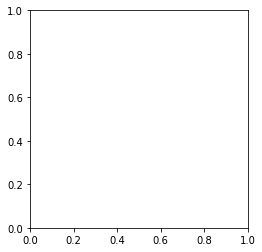

In [ ]:
# matplotlib 라이브러리 임포트
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

plt.imshow(train[0].reshape(5,448,304), cmap= cm.gray_r)
plt.show()

In [ ]:
# Model 생성

class LSTM(nn.Module):
    def __init__(self, hidden_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(3, hidden_size, batch_first=True,
                            num_layers = 2)
        
        self.out = nn.Linear(hidden_size, 1)


    def forward(self, inputs):

        # Turn (seq_len x batch_size x input_size) into (batch_size x input_size x seq_len) for CNN
        inputs = inputs.transpose(1, 2)

        # Run through Conv1d and Pool1d layers
        p = self.c1(inputs)
        # c = self.p1(c)
        # p = self.c2(c)

        # Turn (batch_size x hidden_size x seq_len) back into (seq_len x batch_size x hidden_size) for RNN
        p = p.transpose(2, 1)

        time, _ = self.lstm(p)
        time = self.out(time[:,-5:, :])

        return time.view(-1,5,1)
        # return p


model_clstm = CLSTM(hidden_size = 32).to(device)  # to(device)를 통해 GPU로
model_clstm

In [ ]:
a.shape

(448, 304, 5)

In [ ]:
def show_data(npy):
    num_channel = npy.shape[-1]
    plt.figure(figsize=(3*num_channel, 5))
    for channel in range(num_channel):
        tmpimg = npy[:, :, channel]
        ax = plt.subplot(1, num_channel, channel+1)
        if channel == 0:
          ax.title.set_text("Ice Concentration(0~250)")
        elif channel == 1:
          ax.title.set_text('North Pole')
        elif channel == 2:
          ax.title.set_text('Coastline Mask')
        elif channel == 3:
          ax.title.set_text('Land Mask')
        else:
          ax.title.set_text('NULL VALUE')
        ax.imshow(tmpimg)
    plt.tight_layout()
    plt.show()
    plt.close()

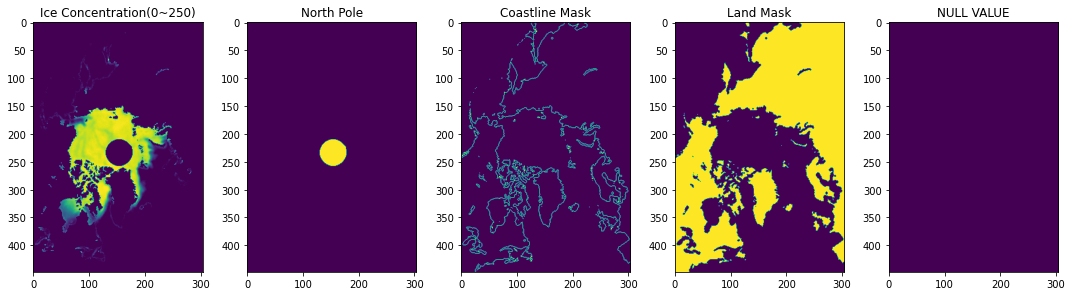

In [ ]:
show_data(a)